# Análise do e-commer no Reino Unido

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import os

## Leitura dos dados

In [2]:
# https://www.ons.gov.uk/businessindustryandtrade/retailindustry/timeseries/j4mc/drsi
# opção: filtered times seris
data = pd.read_csv('../data/J4MC-010820.csv')

In [3]:
data

,Title,Internet sales as a percentage of total retail sales (ratio) (%)
0,CDID,J4MC
1,PreUnit,NaN
2,Unit,%
3,Release date,24-07-2020
4,Next release,21 August 2020
...,...,...
164,2020 FEB,19.0
165,2020 MAR,21.9
166,2020 APR,30.1
167,2020 MAY,32.8


## Pré-processamento

### Remover as primeiras linhas com informações básicas e manter apenas a série temporal

In [4]:
data.head(10)

,Title,Internet sales as a percentage of total retail sales (ratio) (%)
0,CDID,J4MC
1,PreUnit,NaN
2,Unit,%
3,Release date,24-07-2020
4,Next release,21 August 2020
5,2006 NOV,2.8
6,2006 DEC,2.5
7,2007 JAN,2.7
8,2007 FEB,2.8
9,2007 MAR,2.9


In [5]:
data = data.loc[5:]

In [6]:
data.columns = ['Data', 'Taxa de vendas']

### Ajustar os tipos de dados (dtypes)

In [7]:
data.dtypes

Data              object
Taxa de vendas    object
dtype: object

In [8]:
data['Taxa de vendas'] = data['Taxa de vendas'].astype(float)

/home/milton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data

,Data,Taxa de vendas
5,2006 NOV,2.8
6,2006 DEC,2.5
7,2007 JAN,2.7
8,2007 FEB,2.8
9,2007 MAR,2.9
...,...,...
164,2020 FEB,19.0
165,2020 MAR,21.9
166,2020 APR,30.1
167,2020 MAY,32.8


In [10]:
data['Data'] = pd.to_datetime(data['Data'])

/home/milton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data.dtypes

Data              datetime64[ns]
Taxa de vendas           float64
dtype: object

### Filtrar os últimos 10 anos

In [12]:
data = data[data['Data'] >= '2010-06-01']

## Análise dos dados

In [13]:
data.isnull().sum()

Data              0
Taxa de vendas    0
dtype: int64

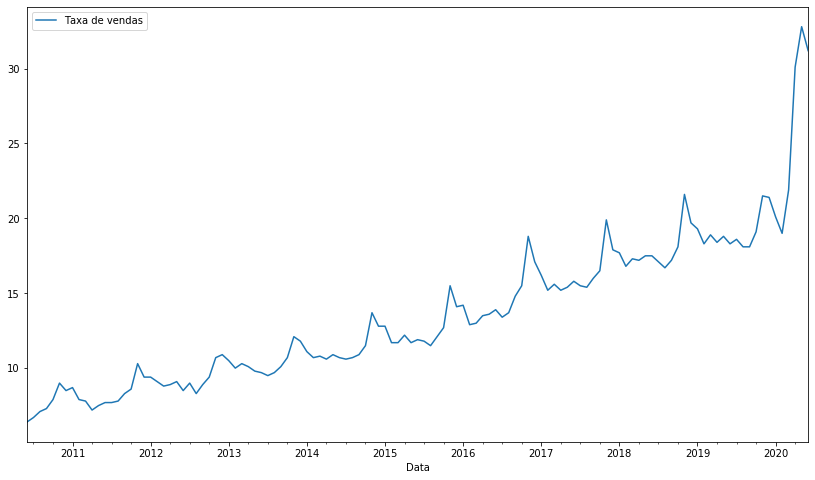

In [14]:
data.plot(x='Data', y='Taxa de vendas', figsize=(14,8))

In [20]:
fig = go.Figure(
    go.Scatter(x=data['Data'], y=data['Taxa de vendas'], line=dict(width=3))

)

fig.update_layout(
    title='Taxa de vendas via e-commerce nos últimos 10 anos',
    xaxis=dict(title='Data', showgrid=False),
    yaxis=dict(title='Taxa de vendas (%)')
)

fig.show()

### Decomposição da série temporal

In [16]:
ts = data.set_index('Data')

In [17]:
result = seasonal_decompose(ts, model='additive')

In [18]:
trace1 = go.Scatter(
    x=result.observed.index,
    y=result.observed
)

trace2 = go.Scatter(
    x=result.trend.index,
    y=result.trend,
    xaxis='x2',
    yaxis='y2'
)

trace3 = go.Scatter(
    x=result.seasonal.index,
    y=result.seasonal,
    xaxis='x3',
    yaxis='y3'
)

trace4 = go.Scatter(
    x=result.resid.index,
    y=result.resid,
    xaxis='x4',
    yaxis='y4'
)

traces = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    showlegend=False
)

fig = make_subplots(
    rows=4,
    cols=1,
    print_grid=False
)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)

fig['layout'].update(
    showlegend=False,
    height=1000,
    yaxis=dict(title="Observed"),
    yaxis2=dict(title="Trend"),
    yaxis3=dict(title="Seasonal"),
    yaxis4=dict(title="Residual"),
    xaxis4=dict(title="Month")
)

fig.show()